In [2]:
#setup
#run on PUI2016_Python2 kernal
%pylab inline
from __future__ import division 
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics import precision_recall_curve,roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import tree

from sqlalchemy import create_engine
import random

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Load Data

this is one entry per zip per year, with the other columns being the avg value over that zip_year

In [9]:
one_per_zipyear = pd.read_csv('Project Data/one_per_zipyear.csv')

In [10]:
# Include dataframe with random sample
one_per_zipyear.shape

(1024, 18)

## Problem Formulation 

#### We are looking to predict the number of hotel hubs (census tracts with above average number of hotels) in NYC. Our dataframe above is all set for use here. 
    #### As a note, we will have a second outcome variable that will capture more zips

## Building a Model

#### Labels (Dependent Variables)

In [11]:
# Our outcome variable is a binary variable. 1 if hotel hub, 0 if not
agg_invest['Y'] = agg_invest['total'] >= 1 , 1, 0)

In [12]:
one_per_zipyear.dtypes

Unnamed: 0                    int64
ZIP_YEAR                     object
zip_code                      int64
year                          int64
hotel_count                   int64
Hotel_Hub                     int64
shopping_count                int64
Shopping_Hub                  int64
manufacturing_zone_count      int64
Manufacturing_Hub             int64
commercial_zone_count         int64
Commercial_Hub                int64
residential_zone_count        int64
Residential_Hub               int64
total_population              int64
median_household_income     float64
hotels_per_capita           float64
AvgAssessTot_ForZip         float64
Y                             int64
dtype: object

#### Features (Independent Variables) 

#The columns are our these variables (some dummies, some continous)

Our features are the following

- `Commerical_Hub`: Binary 

- `Residential_Hub`: Binary

- `Manufacturing_Hub`: Binary

- `Shopping_Hub`: Binary

- `ZIP_YEAR`: Categorical

- `AvgAssessTot_ForZip`: Continous

- `total_population`: Continous

- `median_household_income`: Continous


In [13]:
#Looking at our variables
one_per_zipyear.count()

Unnamed: 0                  1024
ZIP_YEAR                    1024
zip_code                    1024
year                        1024
hotel_count                 1024
Hotel_Hub                   1024
shopping_count              1024
Shopping_Hub                1024
manufacturing_zone_count    1024
Manufacturing_Hub           1024
commercial_zone_count       1024
Commercial_Hub              1024
residential_zone_count      1024
Residential_Hub             1024
total_population            1024
median_household_income     1024
hotels_per_capita           1024
AvgAssessTot_ForZip         1024
Y                           1024
dtype: int64

In [14]:
one_per_zipyear.dtypes

Unnamed: 0                    int64
ZIP_YEAR                     object
zip_code                      int64
year                          int64
hotel_count                   int64
Hotel_Hub                     int64
shopping_count                int64
Shopping_Hub                  int64
manufacturing_zone_count      int64
Manufacturing_Hub             int64
commercial_zone_count         int64
Commercial_Hub                int64
residential_zone_count        int64
Residential_Hub               int64
total_population              int64
median_household_income     float64
hotels_per_capita           float64
AvgAssessTot_ForZip         float64
Y                             int64
dtype: object

### Model Fitting

In [15]:
# Split data by using a pre-defined function from the sklearn package
one_per_zipyear_train, one_per_zipyear_test = train_test_split(one_per_zipyear, test_size=0.5)

In [16]:
# Checking 
one_per_zipyear_train.describe()

,Unnamed: 0,zip_code,year,hotel_count,Hotel_Hub,shopping_count,Shopping_Hub,manufacturing_zone_count,Manufacturing_Hub,commercial_zone_count,Commercial_Hub,residential_zone_count,Residential_Hub,total_population,median_household_income,hotels_per_capita,AvgAssessTot_ForZip,Y
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,512.000000
mean,510.314453,10828.683594,2013.476562,5.027344,0.214844,1.410156,0.234375,175.144531,0.306641,146.271484,0.394531,4549.867188,0.482422,46614.142578,61379.468750,0.000170,1.166174e+06,0.214844
std,293.314557,563.435261,1.710860,9.911903,0.411116,3.004845,0.424022,325.587704,0.461550,195.899218,0.489228,3819.353015,0.500180,24506.904950,26374.984435,0.000473,4.052582e+06,0.411116
min,6.000000,10002.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2507.000000,19536.000000,0.000000,9.669800e+03,0.000000
25%,263.750000,10307.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,0.000000,1392.750000,0.000000,28667.750000,43122.500000,0.000000,4.382414e+04,0.000000
50%,508.000000,11202.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,49.500000,0.000000,73.000000,0.000000,4006.500000,0.000000,41490.500000,57709.500000,0.000034,9.962667e+04,0.000000
75%,772.000000,11362.500000,2015.000000,4.000000,0.000000,1.000000,0.000000,210.000000,1.000000,213.000000,1.000000,6951.500000,1.000000,63084.500000,76020.250000,0.000088,4.236147e+05,0.000000
max,1023.000000,11694.000000,2016.000000,63.000000,1.000000,26.000000,1.000000,2607.000000,1.000000,1145.000000,1.000000,19901.000000,1.000000,112982.000000,250001.000000,0.004690,3.939943e+07,1.000000


In [17]:
# Checking
one_per_zipyear_test.describe()

,Unnamed: 0,zip_code,year,hotel_count,Hotel_Hub,shopping_count,Shopping_Hub,manufacturing_zone_count,Manufacturing_Hub,commercial_zone_count,Commercial_Hub,residential_zone_count,Residential_Hub,total_population,median_household_income,hotels_per_capita,AvgAssessTot_ForZip,Y
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,5.120000e+02,512.000000
mean,512.685547,10834.980469,2013.515625,4.759766,0.218750,1.369141,0.234375,159.597656,0.310547,150.914062,0.414062,4722.074219,0.507812,50551.716797,61043.099609,0.000145,1.070342e+06,0.218750
std,298.443052,570.818977,1.708660,9.527327,0.413803,3.132817,0.424022,280.986970,0.463170,183.681765,0.493041,3968.838059,0.500428,26030.291098,28136.621363,0.000396,3.616892e+06,0.413803
min,0.000000,10001.000000,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3024.000000,19271.000000,0.000000,1.128400e+04,0.000000
25%,247.750000,10304.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.000000,1326.000000,0.000000,29452.000000,41759.000000,0.000000,4.385899e+04,0.000000
50%,513.500000,11203.500000,2013.000000,1.000000,0.000000,0.000000,0.000000,49.500000,0.000000,81.500000,0.000000,4061.500000,1.000000,43940.000000,55246.500000,0.000030,1.193427e+05,0.000000
75%,766.250000,11362.000000,2015.000000,4.000000,0.000000,1.000000,0.000000,207.000000,1.000000,216.500000,1.000000,7131.250000,1.000000,71703.500000,75945.000000,0.000078,4.266675e+05,0.000000
max,1022.000000,11694.000000,2016.000000,63.000000,1.000000,26.000000,1.000000,2616.000000,1.000000,1014.000000,1.000000,20201.000000,1.000000,107962.000000,250001.000000,0.004341,4.487580e+07,1.000000


### Imputation 

In [18]:
print('Number of rows: {}'.format(one_per_zipyear_train.shape[0]))
one_per_zipyear_train['Y'].value_counts(normalize=True)

Number of rows: 512


0    0.785156
1    0.214844
Name: Y, dtype: float64

In [19]:
print('Number of rows: {}'.format(one_per_zipyear_test.shape[0]))
one_per_zipyear_test['Y'].value_counts(normalize=True)

Number of rows: 512


0    0.78125
1    0.21875
Name: Y, dtype: float64

### Scaling of Values

##### Do we need to do the same with our median income variable?

In [20]:
# For AvgAssessTot_ForZip & total_population

min_training_cost = one_per_zipyear_train['AvgAssessTot_ForZip'].min()
max_training_cost = one_per_zipyear_train['AvgAssessTot_ForZip'].max()

one_per_zipyear_train['total_population'] = (one_per_zipyear_train['AvgAssessTot_ForZip'] - min_training_cost)/(max_training_cost-min_training_cost)


In [21]:
one_per_zipyear_train[['total_population','AvgAssessTot_ForZip']].describe()

,total_population,AvgAssessTot_ForZip
count,512.000000,5.120000e+02
mean,0.029361,1.166174e+06
std,0.102884,4.052582e+06
min,0.000000,9.669800e+03
25%,0.000867,4.382414e+04
50%,0.002284,9.962667e+04
75%,0.010509,4.236147e+05
max,1.000000,3.939943e+07


In [22]:
one_per_zipyear_test['total_population'] = (one_per_zipyear_test['AvgAssessTot_ForZip'] - min_training_cost)/(max_training_cost-min_training_cost)

### Crosstabs

In [23]:
#for AvgAssessTot_ForZip

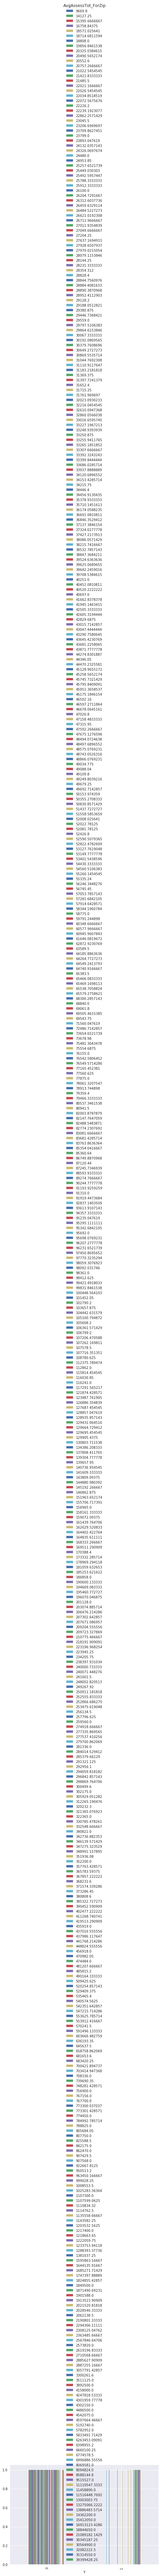

In [24]:
pd.crosstab(index=one_per_zipyear_train['Y'], columns=one_per_zipyear_train['AvgAssessTot_ForZip']).plot(kind='bar')

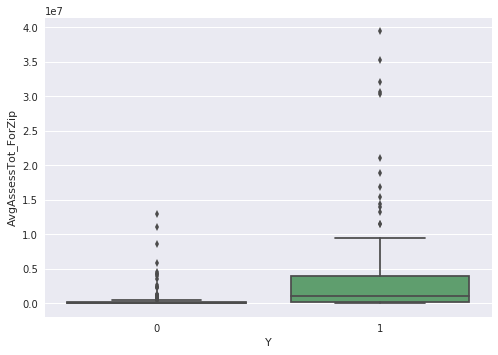

In [25]:
ax = sns.boxplot(x="Y", y="AvgAssessTot_ForZip", data=one_per_zipyear_train)

In [26]:
#for total_population

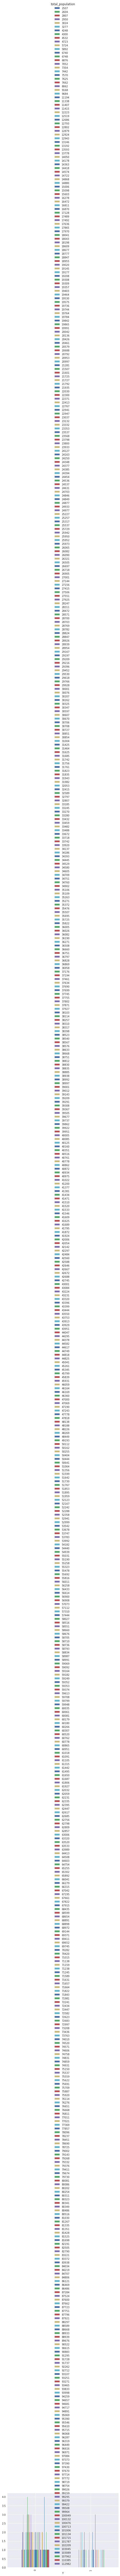

In [27]:
pd.crosstab(index=one_per_zipyear['Y'], columns=one_per_zipyear['total_population']).plot(kind='bar')

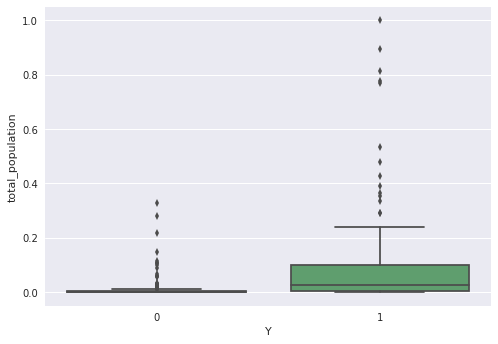

In [28]:
ax = sns.boxplot(x="Y", y="total_population", data=one_per_zipyear_train)

In [29]:
#for median_household_income

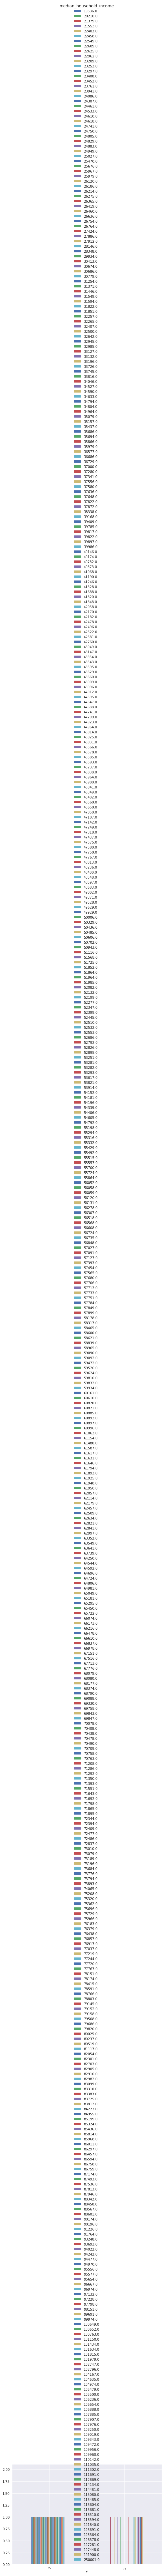

In [30]:
pd.crosstab(index=one_per_zipyear_train['Y'], columns=one_per_zipyear_train['median_household_income']).plot(kind='bar')

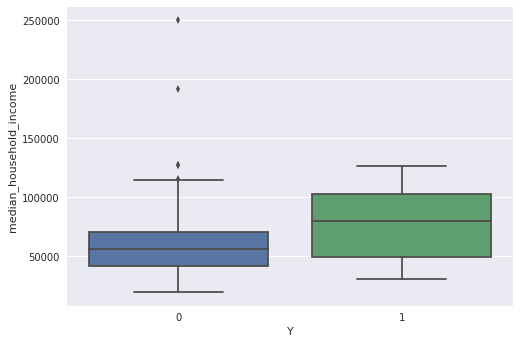

In [31]:
ax = sns.boxplot(x="Y", y="median_household_income", data=one_per_zipyear_train)

In [32]:
#for Shopping_Hub

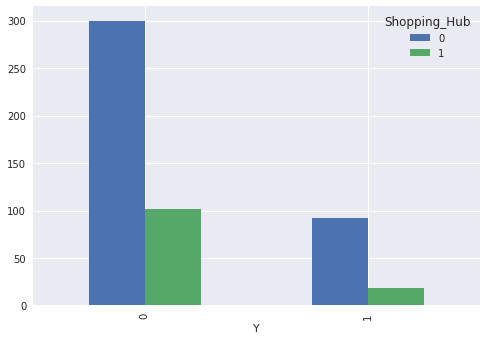

In [33]:
pd.crosstab(index=one_per_zipyear_train['Y'], columns=one_per_zipyear_train['Shopping_Hub']).plot(kind='bar')

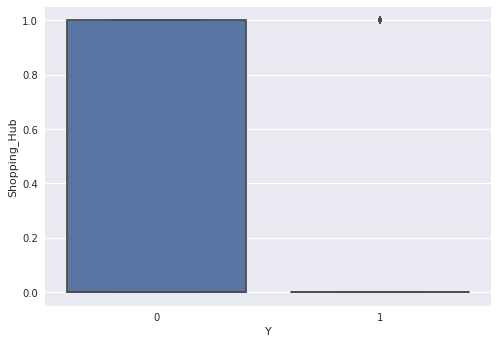

In [34]:
ax = sns.boxplot(x="Y", y="Shopping_Hub", data=one_per_zipyear_train)

In [35]:
#for residential hubs

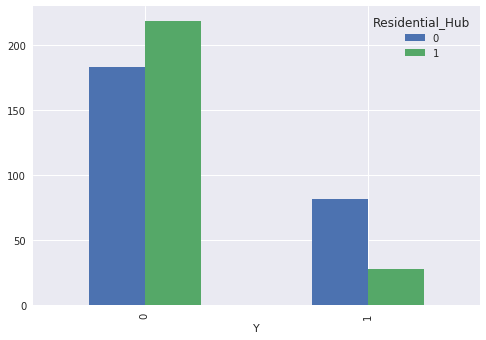

In [36]:
pd.crosstab(index=one_per_zipyear_train['Y'], columns=one_per_zipyear_train['Residential_Hub']).plot(kind='bar')

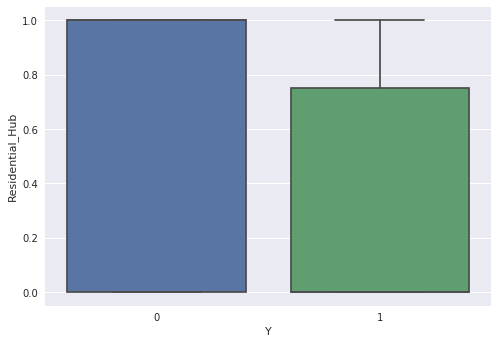

In [37]:
ax = sns.boxplot(x="Y", y="Residential_Hub", data=one_per_zipyear_train)

In [38]:
#for commercial hubs

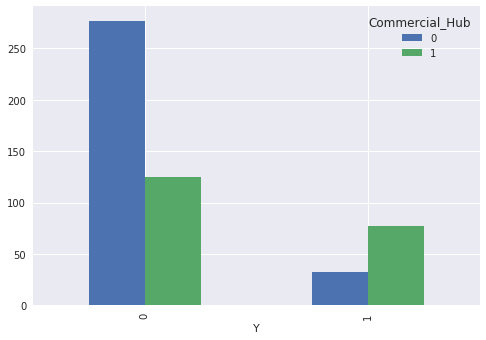

In [39]:
pd.crosstab(index=one_per_zipyear_train['Y'], columns=one_per_zipyear_train['Commercial_Hub']).plot(kind='bar')

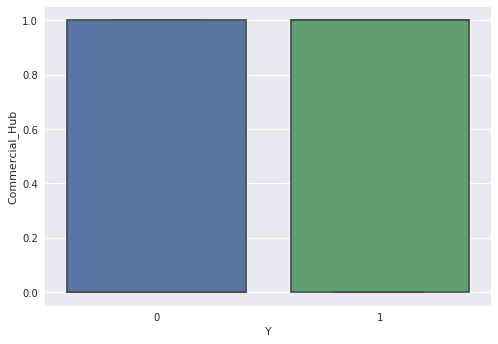

In [40]:
ax = sns.boxplot(x="Y", y="Commercial_Hub", data=one_per_zipyear_train)

In [41]:
#for manufacturing hubs

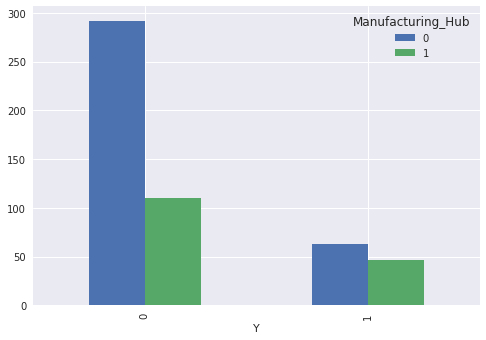

In [42]:
pd.crosstab(index=one_per_zipyear_train['Y'], columns=one_per_zipyear_train['Manufacturing_Hub']).plot(kind='bar')

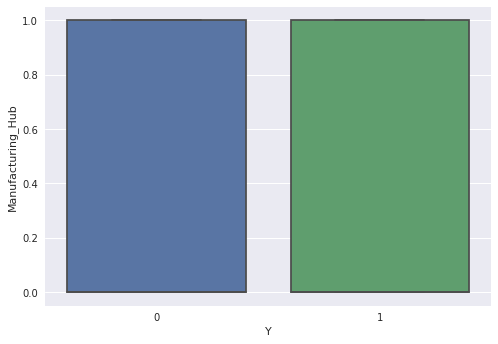

In [43]:
ax = sns.boxplot(x="Y", y="Manufacturing_Hub", data=one_per_zipyear_train)

### Split into features and labels

In [44]:
##filter_col = [col for col in randomsample_train if col.startswith('organization')]
# In the sel_features, we need to add our variables
sel_features = ['Commercial_Hub', 'Residential_Hub','Manufacturing_Hub','Shopping_Hub',
                'AvgAssessTot_ForZip','total_population','median_household_income']
sel_label = 'Y'

In [45]:
# use conventions typically used in python scikitlearn

X_train = one_per_zipyear_train[sel_features].values
y_train = one_per_zipyear_train[sel_label].values
X_test = one_per_zipyear_test[sel_features].values
y_test = one_per_zipyear_test[sel_label].values

### Model Selection 

In [46]:
# Fit Model
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l1', C=1e5)
model.fit( X_train, y_train )
print(model)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


### Model Understanding

In [47]:
print "The coefficients for each of the features are " 
zip(sel_features, model.coef_[0])

The coefficients for each of the features are 


[('Commercial_Hub', 1.1603811237250967),
 ('Residential_Hub', -0.79060206225709617),
 ('Manufacturing_Hub', 1.2117106094451782),
 ('Shopping_Hub', 0.12892534712226583),
 ('AvgAssessTot_ForZip', 1.5052660098206251e-07),
 ('total_population', 6.1235316700733442),
 ('median_household_income', 1.3121356532727305e-05)]

In [48]:
std_coef = np.std(X_test,0)*model.coef_
zip(sel_features, std_coef[0])

[('Commercial_Hub', 0.57155661071487029),
 ('Residential_Hub', -0.39525277366256489),
 ('Manufacturing_Hub', 0.56067974140125021),
 ('Shopping_Hub', 0.054613750877497202),
 ('AvgAssessTot_ForZip', 0.54390654635419922),
 ('total_population', 0.56173266837158609),
 ('median_household_income', 0.36882992658150437)]

### Model Evaluation 

In [49]:
#  from our "predictors" using the model.
y_scores = model.predict_proba(X_test)[:,1]

In [50]:
y_scores

array([ 0.41634186,  0.46813761,  0.616502  ,  0.09731041,  0.26309353,
        0.11133543,  0.04902787,  0.12979486,  0.1120278 ,  0.09894824,
        0.06783991,  0.14834739,  0.03507894,  0.47009597,  0.10034441,
        0.03907494,  0.09881196,  0.03455656,  0.13468357,  0.63941414,
        0.54343312,  0.04617447,  0.04407953,  0.25354379,  0.04516874,
        0.0502069 ,  0.22637466,  0.07878608,  0.07770734,  0.05395563,
        0.99999425,  0.07433748,  0.04622083,  0.09735   ,  0.24223265,
        0.12357782,  0.06226337,  0.06755696,  0.94110147,  0.7796402 ,
        0.04939611,  0.12897567,  0.6827384 ,  0.39961614,  0.25247353,
        0.05732225,  0.27408068,  0.1347468 ,  0.08099724,  0.10519534,
        0.99187703,  0.10180056,  0.21768921,  0.04447422,  0.04666221,
        0.0818031 ,  0.41542418,  0.49878393,  0.0387116 ,  0.10909273,
        0.12735467,  0.07759237,  0.11883391,  0.99999951,  0.44937855,
        0.31982777,  0.06503742,  0.37301965,  0.22716929,  0.12

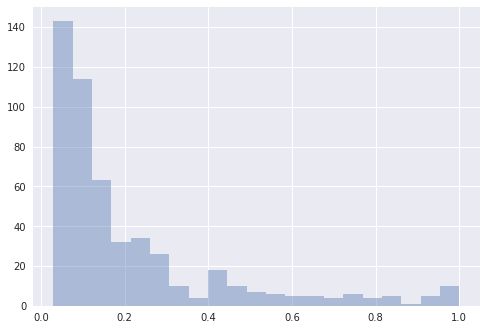

In [51]:
sns.distplot(y_scores, kde=False, rug=False)

In [53]:
one_per_zipyear_test['y_score'] = y_scores

In [54]:
one_per_zipyear_test[['y_score']].head()

,y_score
110,0.416342
334,0.468138
48,0.616502
174,0.097310
632,0.263094


In [55]:
calc_threshold = lambda x,y: 0 if x < y else 1 
predicted = np.array( [calc_threshold(score,0.50) for score in y_scores] )
expected = y_test

### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(expected,predicted)
print conf_matrix

[[386  14]
 [ 70  42]]


In [57]:
# generate an accuracy score by comparing expected to predicted.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(expected, predicted)
print( "Accuracy = " + str( accuracy ) )

Accuracy = 0.8359375


In [58]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(expected, predicted)
recall = recall_score(expected, predicted)
print( "Precision = " + str( precision ) )
print( "Recall= " + str(recall))

Precision = 0.75
Recall= 0.375


In [59]:
def plot_precision_recall(y_true,y_score):
    """
    Plot a precision recall curve
    
    Parameters
    ----------
    y_true: ls
        ground truth labels
    y_score: ls
        score output from model
    """
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true,y_score)
    plt.plot(recall_curve, precision_curve)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    auc_val = auc(recall_curve,precision_curve)
    print('AUC-PR: {0:1f}'.format(auc_val))
    plt.show()
    plt.clf()

AUC-PR: 0.568605


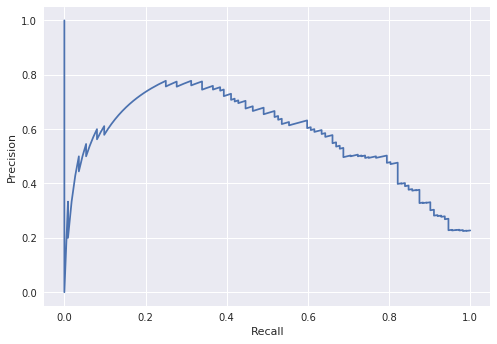

In [60]:
plot_precision_recall(expected, y_scores)

### Precision and Recall k%

In [61]:
def plot_precision_recall_n(y_true, y_prob, model_name):
    """
    y_true: ls 
        ls of ground truth labels
    y_prob: ls
        ls of predic proba from model
    model_name: str
        str of model name (e.g, LR_123)
    """
    from sklearn.metrics import precision_recall_curve
    y_score = y_prob
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_score)
    precision_curve = precision_curve[:-1]
    recall_curve = recall_curve[:-1]
    pct_above_per_thresh = []
    number_scored = len(y_score)
    for value in pr_thresholds:
        num_above_thresh = len(y_score[y_score>=value])
        pct_above_thresh = num_above_thresh / float(number_scored)
        pct_above_per_thresh.append(pct_above_thresh)
    pct_above_per_thresh = np.array(pct_above_per_thresh)
    plt.clf()
    fig, ax1 = plt.subplots()
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax1.set_ylim(0,1.05)
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax2.set_ylim(0,1.05)
    
    name = model_name
    plt.title(name)
    plt.show()
    plt.clf()

In [62]:
def precision_at_k(y_true, y_scores,k):
    
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores ])
    return precision_score(y_true, y_pred)

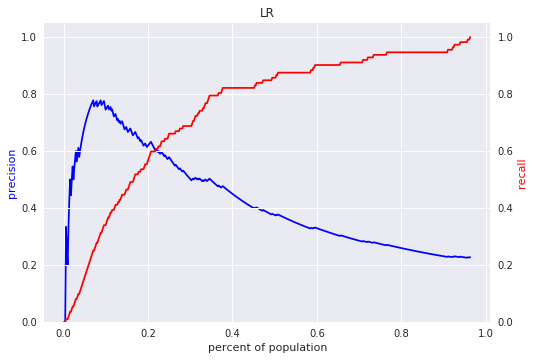

In [63]:
plot_precision_recall_n(expected,y_scores, 'LR')

In [64]:
p_at_1 = precision_at_k(expected,y_scores, 0.01)
print('Precision at 1%: {:.2f}'.format(p_at_1))

Precision at 1%: 0.33


### Assess Model Against Baselines

In [65]:
# Random Baseline
random_score = [random.uniform(0,1) for i in enumerate(y_test)] 
random_predicted = np.array( [calc_threshold(score,0.5) for score in random_score] )
random_p_at_5 = precision_at_k(expected,random_predicted, 0.01)
print('Precision at 1% (random): {:.2f}'.format(random_p_at_5))

Precision at 1% (random): 0.21


### Decision Tree

In [66]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

### Survey of Algorithms

In [67]:
clfs = {'RF': RandomForestClassifier(n_estimators=50, n_jobs=-1),
       'ET': ExtraTreesClassifier(n_estimators=10, n_jobs=-1, criterion='entropy'),
        'LR': LogisticRegression(penalty='l1', C=1e5),
        'SGD':SGDClassifier(loss='log'),
        'GB': GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, random_state=17, n_estimators=10),
        'NB': GaussianNB()}

In [68]:
sel_clfs = ['RF', 'ET', 'LR', 'SGD', 'GB', 'NB']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


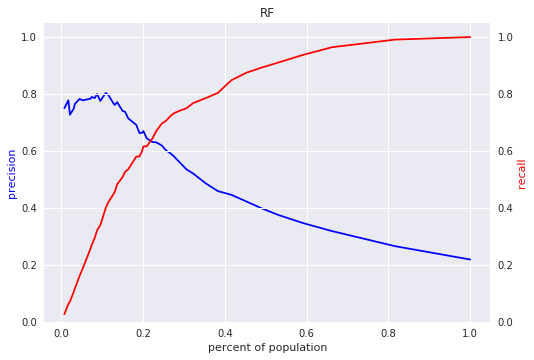

FEATURE IMPORTANCES
{'total_population': 0.31058024873786466, 'Commercial_Hub': 0.044390209857069214, 'median_household_income': 0.26107345714576224, 'Manufacturing_Hub': 0.038426554916157742, 'AvgAssessTot_ForZip': 0.29590938913791226, 'Shopping_Hub': 0.026903996048304797, 'Residential_Hub': 0.022716144156929078}


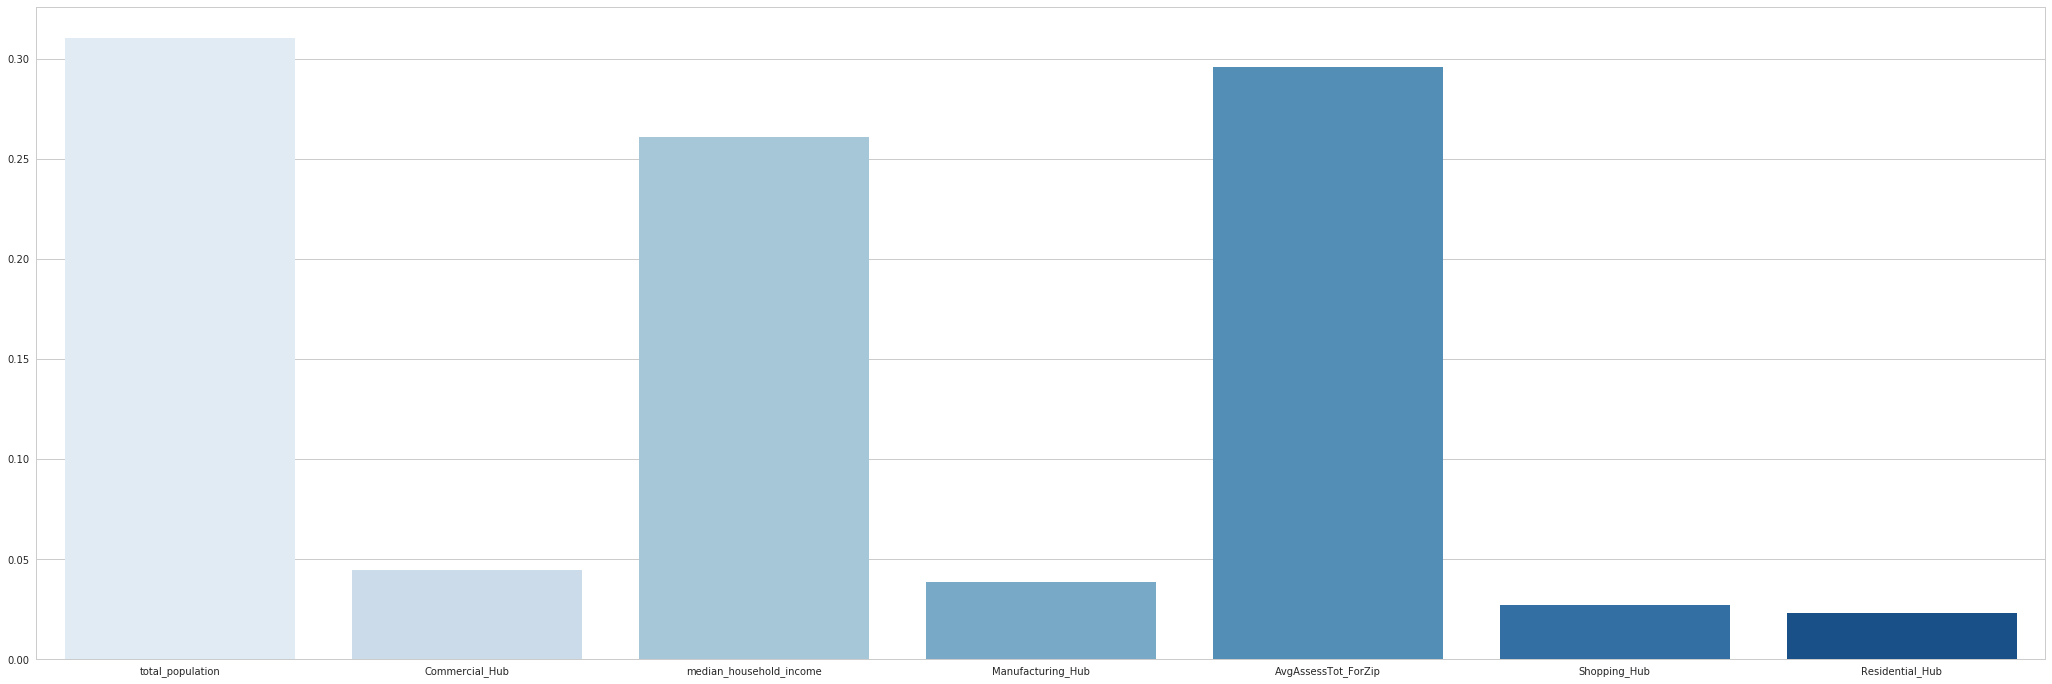

Precision at 1%: 0.78
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


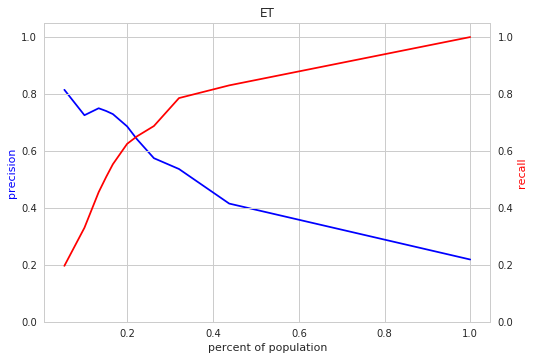

FEATURE IMPORTANCES
{'total_population': 0.2563594179353027, 'Commercial_Hub': 0.09686392231820222, 'median_household_income': 0.27120820618085423, 'Manufacturing_Hub': 0.057280675035336383, 'AvgAssessTot_ForZip': 0.24358222517754405, 'Shopping_Hub': 0.030057646721724056, 'Residential_Hub': 0.044647906631036433}


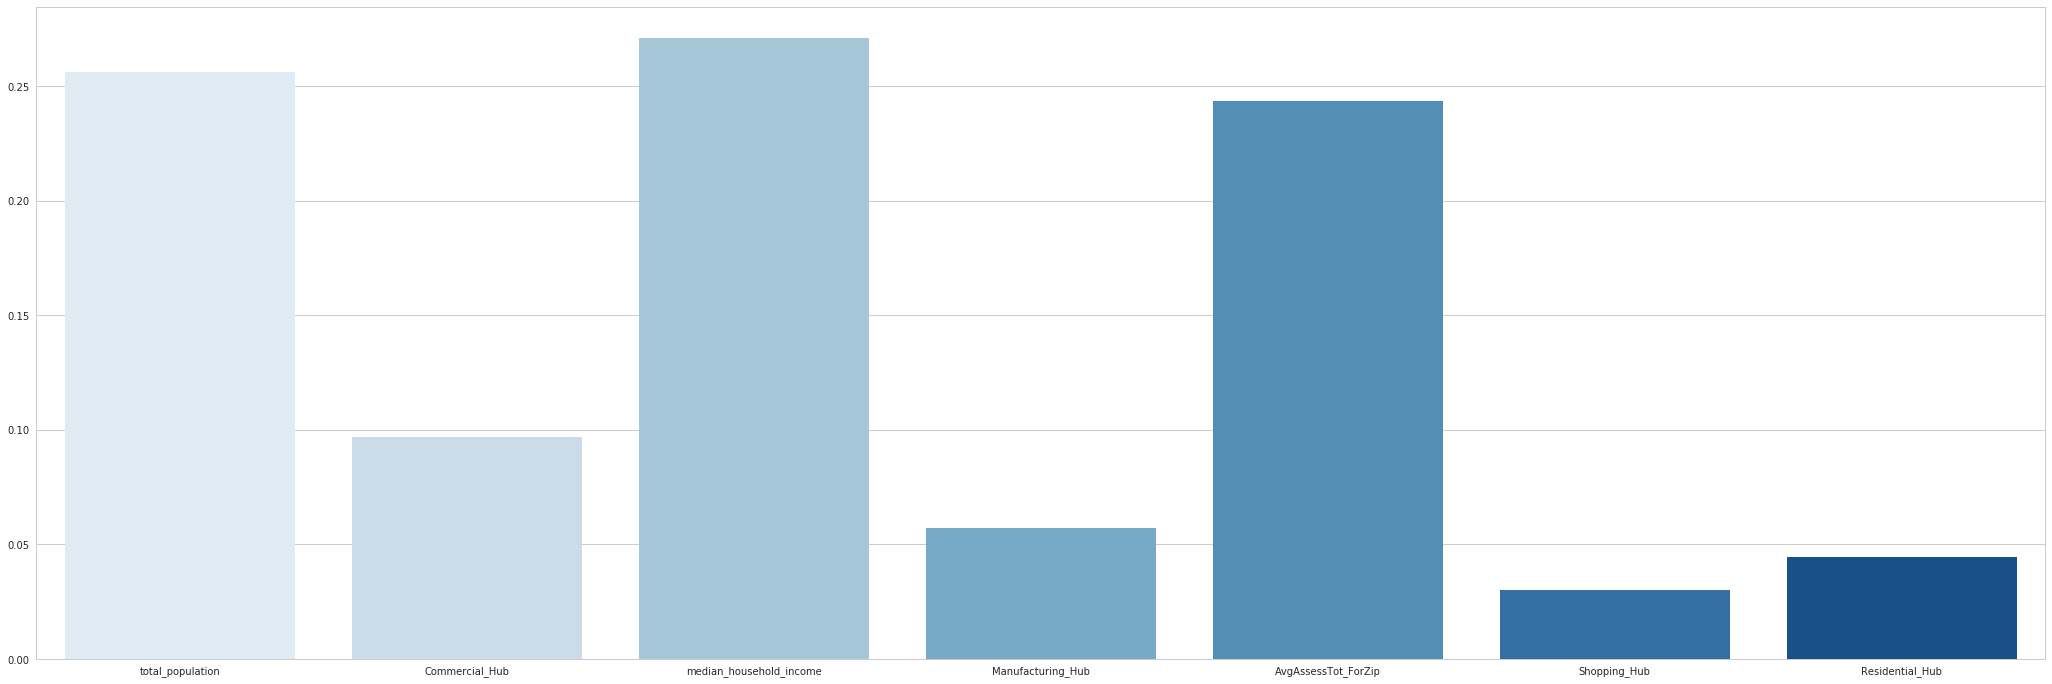

Precision at 1%: 0.81
LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


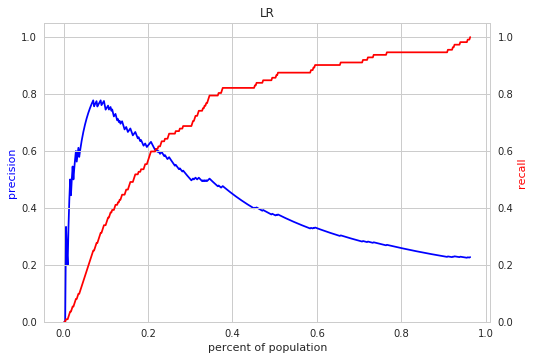

FEATURE IMPORTANCES
{'total_population': 8.1508951621526524, 'Commercial_Hub': 1.1601141917618505, 'median_household_income': 1.3122346012050721e-05, 'Manufacturing_Hub': 1.2118872148897362, 'AvgAssessTot_ForZip': 9.9314230937907842e-08, 'Shopping_Hub': 0.12905122163328864, 'Residential_Hub': -0.79045457582826895}


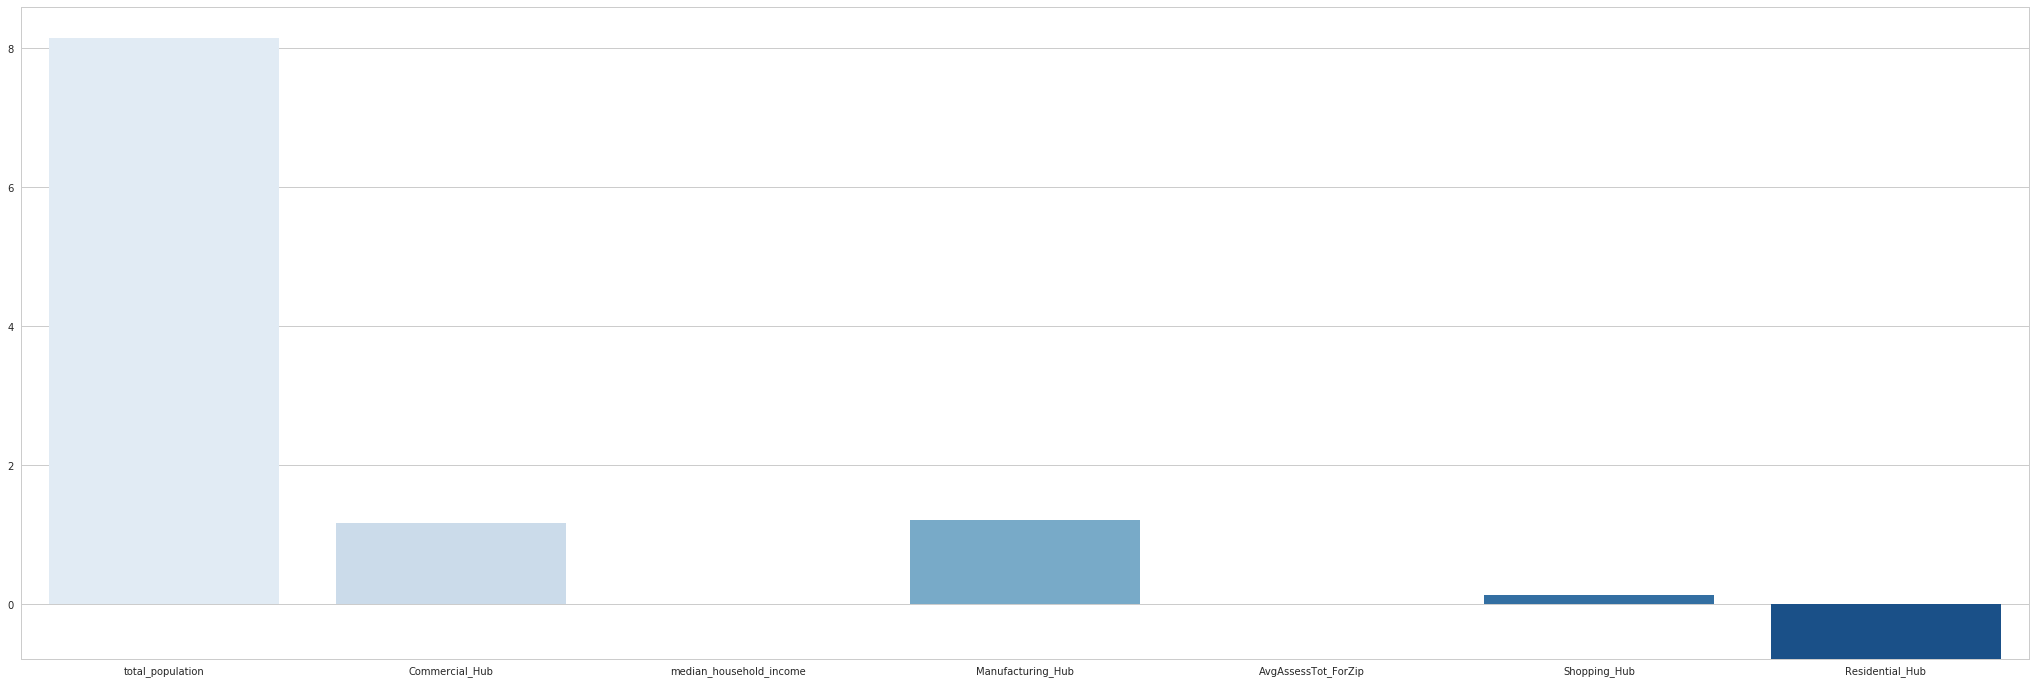

Precision at 1%: 0.33
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


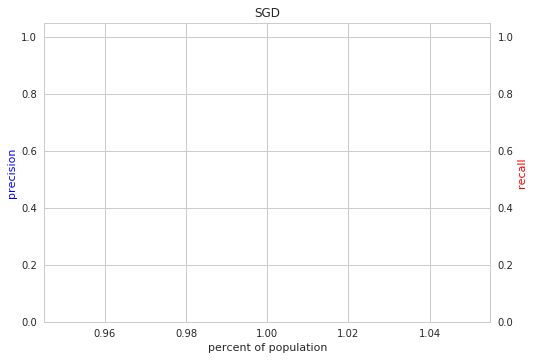

FEATURE IMPORTANCES
{'total_population': 0.10262358101362112, 'Commercial_Hub': -345.60269738690511, 'median_household_income': -54722753.582466774, 'Manufacturing_Hub': -272.54846867097376, 'AvgAssessTot_ForZip': -8605313.008744467, 'Shopping_Hub': -192.46979488620318, 'Residential_Hub': -453.77915144703337}


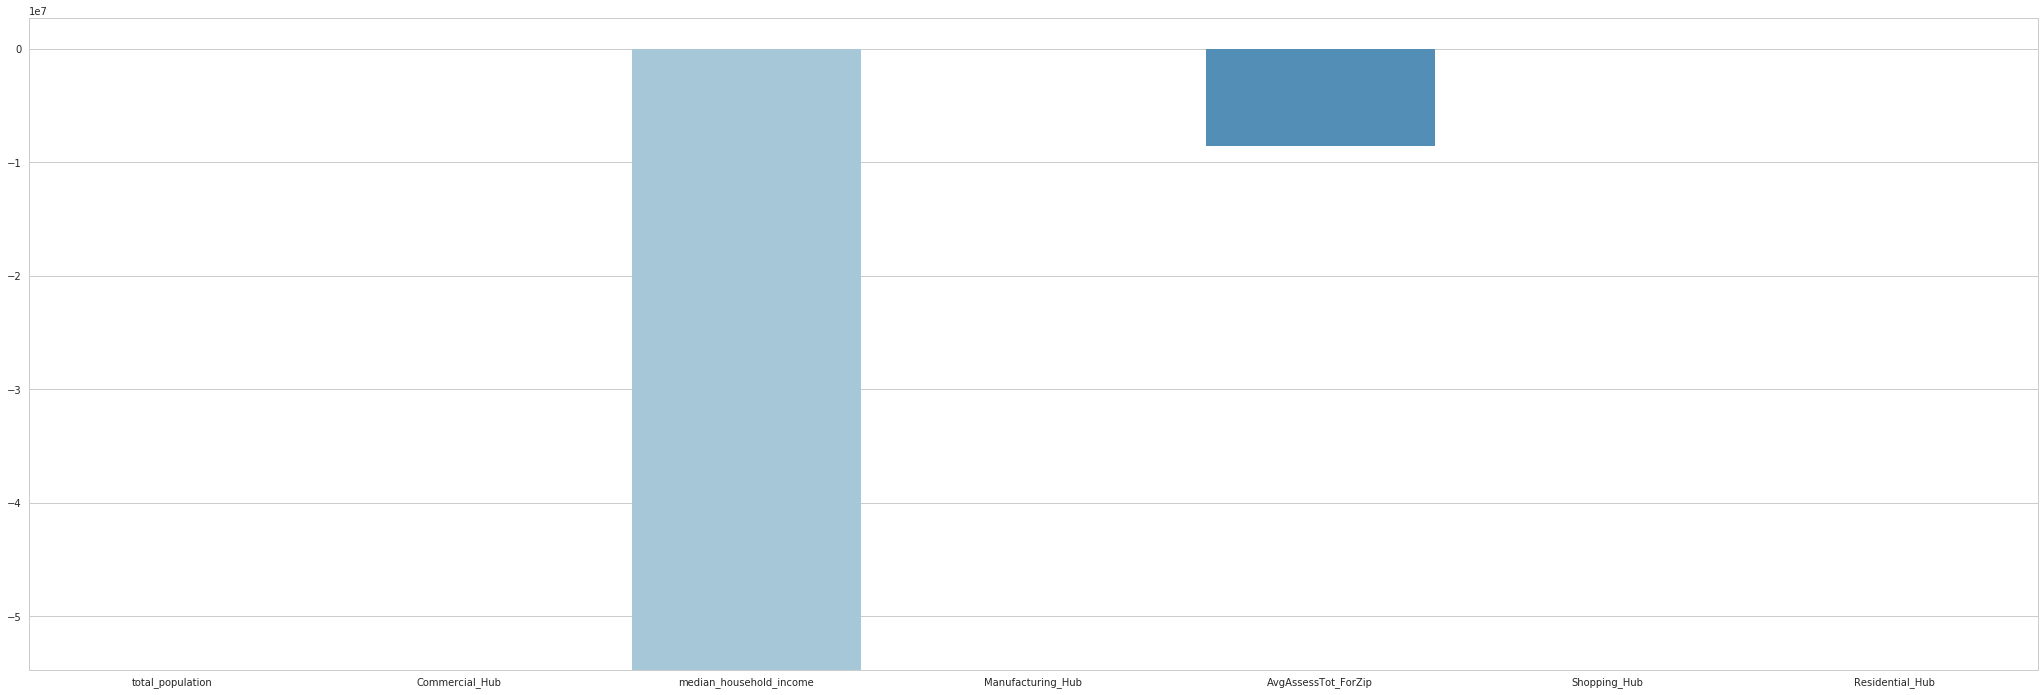

Precision at 1%: 0.22
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=17, subsample=0.5, verbose=0,
              warm_start=False)


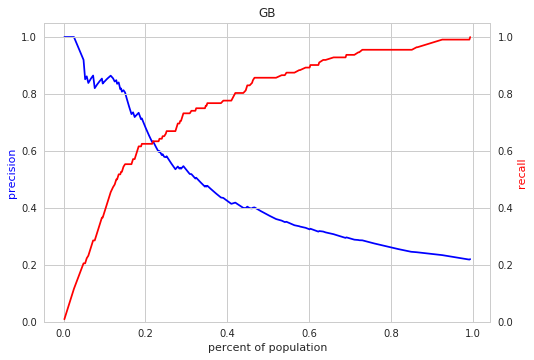

FEATURE IMPORTANCES
{'total_population': 0.23083974625144679, 'Commercial_Hub': 0.022805321903587823, 'median_household_income': 0.33473529179092015, 'Manufacturing_Hub': 0.044544232704948554, 'AvgAssessTot_ForZip': 0.30727851537208545, 'Shopping_Hub': 0.027194920430486418, 'Residential_Hub': 0.032601971546524895}


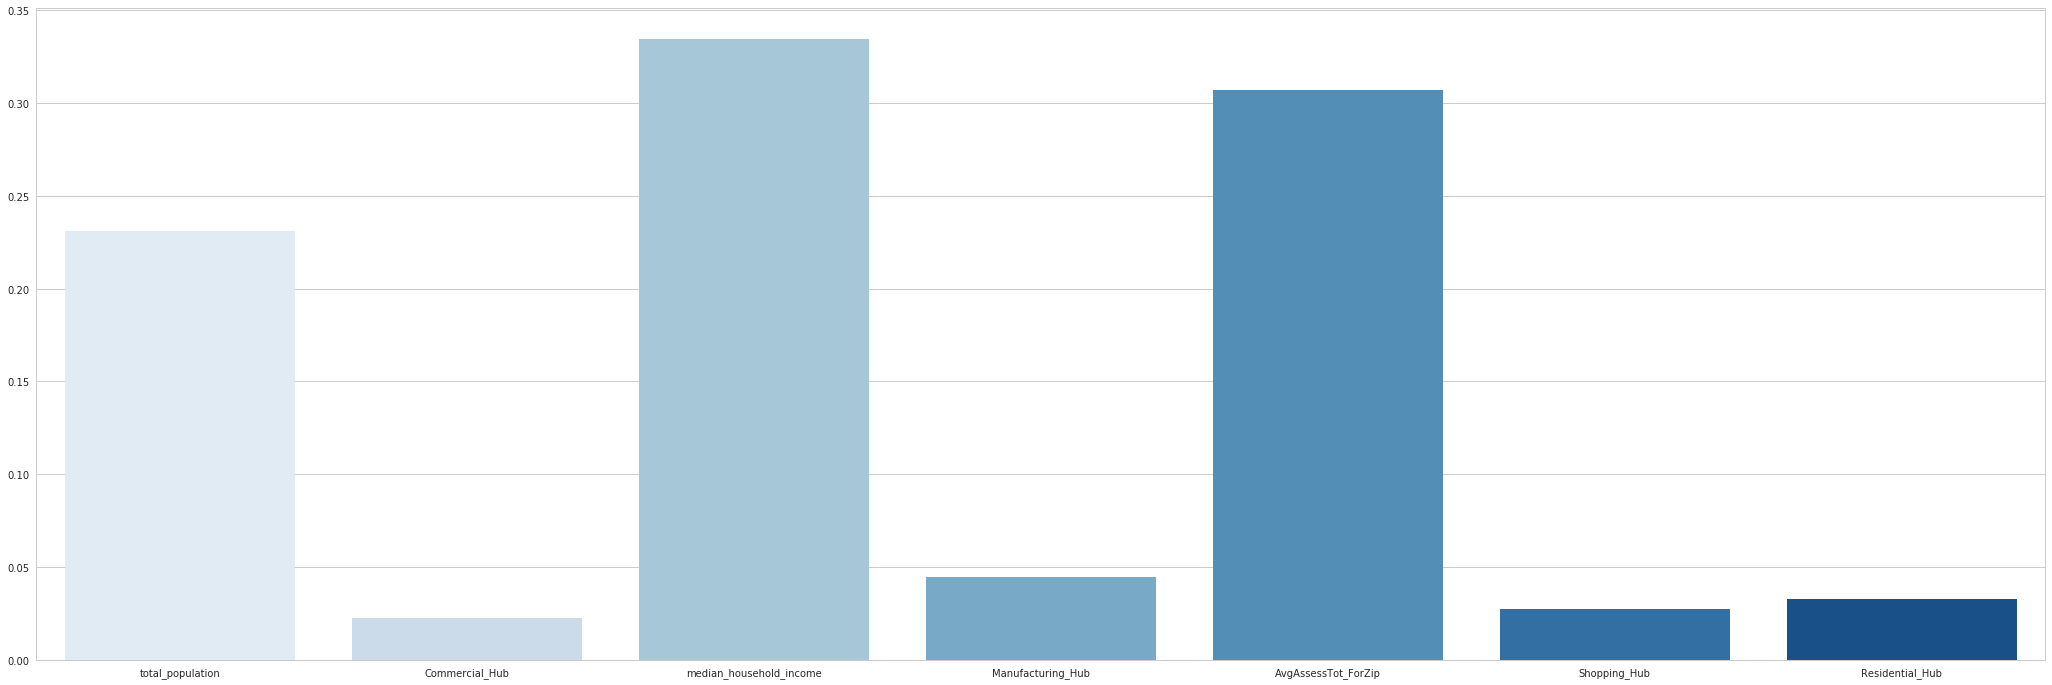

Precision at 1%: 1.00
GaussianNB(priors=None)


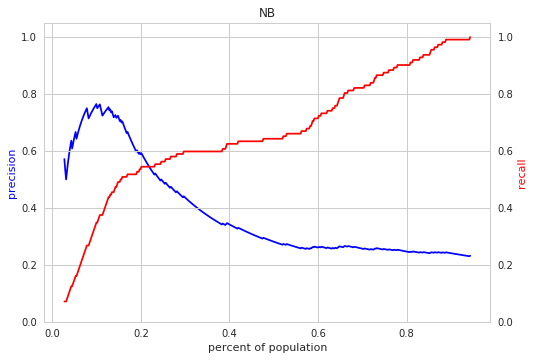

FEATURE IMPORTANCES
{'total_population': 0.23083974625144679, 'Commercial_Hub': 0.022805321903587823, 'median_household_income': 0.33473529179092015, 'Manufacturing_Hub': 0.044544232704948554, 'AvgAssessTot_ForZip': 0.30727851537208545, 'Shopping_Hub': 0.027194920430486418, 'Residential_Hub': 0.032601971546524895}


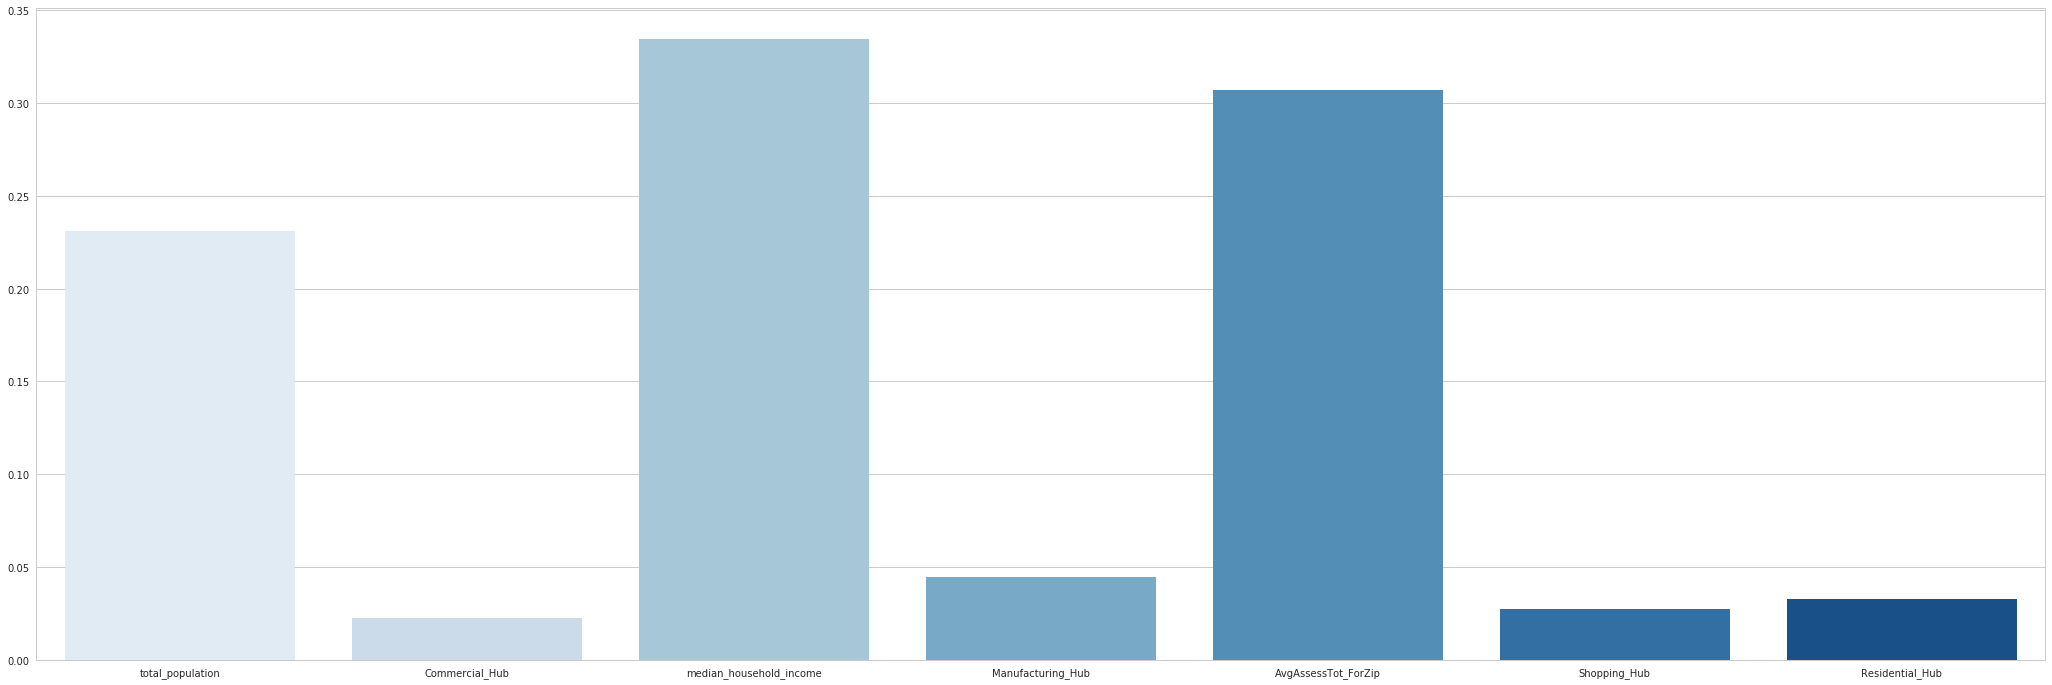

Precision at 1%: 0.57


In [69]:
max_p_at_k = 0
df_results = pd.DataFrame()
for clfNM in sel_clfs:
    clf = clfs[clfNM]
    clf.fit( X_train, y_train )
    print clf
    y_score = clf.predict_proba(X_test)[:,1]
    predicted = np.array(y_score)
    expected = np.array(y_test)
    plot_precision_recall_n(expected,predicted, clfNM)
    p_at_1 = precision_at_k(expected,y_score, 0.01)
    p_at_5 = precision_at_k(expected,y_score,0.05)
    p_at_10 = precision_at_k(expected,y_score,0.10)
    fpr, tpr, thresholds = roc_curve(expected,y_score)
    auc_val = auc(fpr,tpr)
    df_results = df_results.append([{
        'clfNM':clfNM,
        'p_at_1':p_at_1,
        'p_at_5':p_at_5,
        'p_at_10':p_at_10,
        'auc':auc_val,
        'clf': clf
    }])
    
    #feature importances
    if hasattr(clf, 'coef_'):
        feature_import = dict(
            zip(sel_features,clf.coef_.ravel()))
    elif hasattr(clf, 'feature_importances_'):
        feature_import = dict(
            zip(sel_features, clf.feature_importances_))
    print("FEATURE IMPORTANCES")
    print(feature_import)
    
    plt.clf()
    sns.set_style('whitegrid')
    f, ax = plt.subplots(figsize=(36,12))
    sns.barplot(x=feature_import.keys(), y = feature_import.values(), palette="Blues")
    plt.show()
    
    if max_p_at_k < p_at_1:
        max_p_at_k = p_at_1
    print('Precision at 1%: {:.2f}'.format(p_at_1))
df_results.to_csv('modelrun_zipyear.csv')